## BASIC MNIST USAGE

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("TENSORFLOW VERSION IS [%s]" % (tf.__version__))

TENSORFLOW VERSION IS [1.1.0]


#### DOWNLOAD MNIST

In [3]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


#### HOW DOES IT LOOK LIKE?

In [16]:
def print_np(x):
    print ('SHAPE OF is %s' % (x.shape,))
    print ('VALUES LOOK LIKE \n %s' % (x))

In [17]:
print_np(mnist.train.images)
print_np(mnist.train.labels)

SHAPE OF is (55000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (55000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [18]:
print_np(mnist.test.images)
print_np(mnist.test.labels)

SHAPE OF is (10000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (10000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [19]:
print_np(mnist.validation.images)
print_np(mnist.validation.labels)

SHAPE OF is (5000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (5000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


#### PLOT TRAIN IMAGES

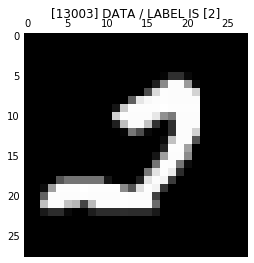

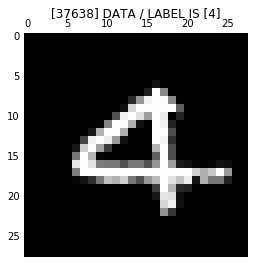

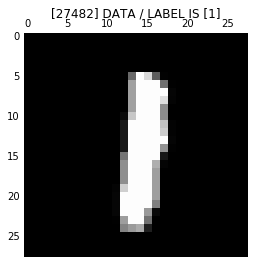

In [33]:
ntrain = mnist.train.images.shape[0]
nsample = 3
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28, 28))
    label = np.argmax(labelvec)
    plt.matshow(img, cmap=plt.get_cmap('gray'))
    plt.title("[%d] DATA / LABEL IS [%d]"%(i, label))

#### GET RANDOM MINIBATCH

##### FIRST, RANDOM PERMUTE

In [52]:
ntrain = 10
randindices = np.random.permutation(ntrain)
print (randindices.shape)

(10,)


##### THEN, SELECT MINIBATCH

In [66]:
ntrain = 10
nbatch = 4
niter  = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i*nbatch:(i+1)*nbatch]
    print ("ITER: [%d] BATCH INDEX: %s" % (i, currindices))
    # GET BATCH
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print ("  - SHAPE OF 'XBATCH' IS %s" % (xbatch.shape,))
    print ("  - SHAPE OF 'YBATCH' IS %s" % (ybatch.shape,))

ITER: [0] BATCH INDEX: [7 9 2 1]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [1] BATCH INDEX: [4 8 3 6]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [2] BATCH INDEX: [5 0]
  - SHAPE OF 'XBATCH' IS (2, 784)
  - SHAPE OF 'YBATCH' IS (2, 10)
